#### **1 : Loan Approval - Exploratory Data Analysis (EDA)**

#### **Life Cycle of a Machine Learning Project**

1. **Understanding the Problem Statement**
2. **Data Collection**
3. **Data Checks to Perform**
4. **Exploratory Data Analysis**
5. **Data Pre-Processing**
6. **Model Training**
7. **Selecting the Best Model**

---

#### **Problem Statement**

The objective of this project is to investigate how various financial and demographic factors influence the likelihood of loan approval. Important features to consider include applicant income, credit score, loan amount, employment status, and other relevant variables. Ultimately, the goal is to predict whether a loan application will be approved based on these characteristics.

---

#### **Data Collection**

- **Dataset Source**: [Loan Approval Dataset](notebook/data/loan_approval_dataset.csv)
- The dataset comprises **13 columns** and **4269 rows**.

---

#### **Importing Data and Required Packages**

In this section, we will import the necessary libraries for analyzing the loan approval data. The libraries required for this analysis include:



In [1]:
import numpy as np  # Importing the NumPy library for numerical operations, such as array manipulation and mathematical functions.
# The comment 'type: ignore' is used to instruct type checkers to ignore any type-related issues with this import.

import pandas as pd  # Importing the Pandas library for data manipulation and analysis, particularly for handling data in DataFrame format.
# Again, 'type: ignore' is included to bypass type checking for this import.

import seaborn as sns  # Importing the Seaborn library, which is built on Matplotlib, for enhanced statistical data visualization.
# This also includes 'type: ignore' for similar reasons as above.

import matplotlib.pyplot as plt  # Importing the Matplotlib library for creating static, animated, and interactive visualizations in Python.
# 'type: ignore' is included to avoid any potential type-checking errors with this import.

# This magic command ensures that Matplotlib plots will be displayed inline, directly below the code cells in Jupyter Notebooks.
%matplotlib inline

import warnings  # Importing the warnings module to control the display of warning messages in Python.
warnings.filterwarnings('ignore')  # This line suppresses all warnings, preventing them from being displayed in the output.
# This is particularly useful in data analysis to avoid cluttering the output with warning messages that do not impact the execution.


#### **2 : Data Checks to Perform**
Before diving into Exploratory Data Analysis (EDA), it's essential to perform several checks to ensure the dataset's quality. These checks help identify and address any potential issues that could negatively impact the analysis or model training.

##### **Load the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('data\loan_approval_dataset.csv')

#### **Inspect the Data**

In [3]:
# Display the first few rows of the dataset
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


#### **Check for Missing Values**

In [4]:
# Check for missing values
df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

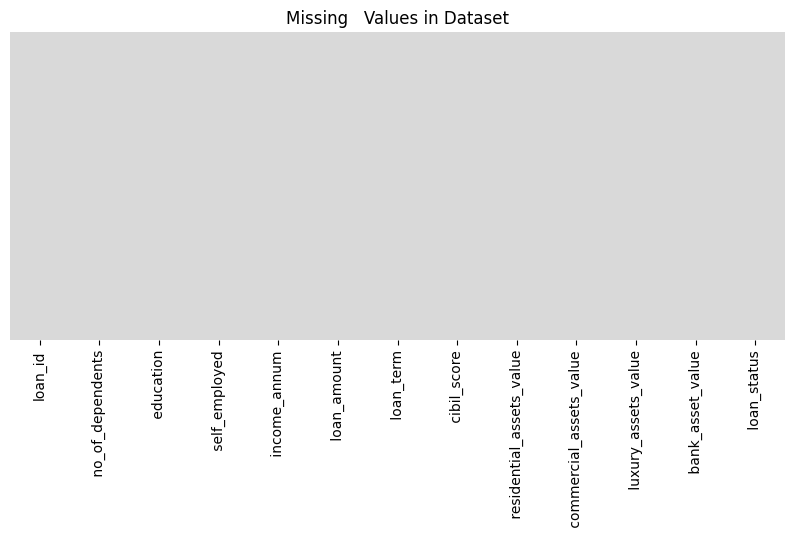

In [5]:
# Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing   Values in Dataset')
plt.show()

#### **Check for dimensions shape for  data**

In [6]:
df.shape

(4269, 13)

#### **Check for Duplicated Values**

In [7]:
df.duplicated().sum()

0

#### **Check for Dtypes**

In [8]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

#### **Check for information data**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### **Check for unique values of each column data**

In [10]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

#### **Check for Removed of Unnecessary Columns from Data**

In [11]:
# Drop a column permanently from the DataFrame
df.drop(columns=['loan_id'], inplace=True)
# Drop a column permanently from the DataFrame



#### **Check for Removed the white space from  Columns of  Data**

In [12]:

df.columns = df.columns.str.strip()

#### **Check for Descriptive Statistics analysis for each numerical features of data**

In [13]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#### **Check for numerical & categorical columns**

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

We have 3 categorical features : ['education', 'self_employed', 'loan_status']


#### **Check for categorical columns Unique Value**

In [15]:
print("Unique Value in Categorical Columns :")

# Loop through each specified column to print its unique values
for column in ['education', 'self_employed', 'loan_status']:
    # Print the unique categories found in the current colum
    print(f"Categories in column '{column}': {df[column].unique()}")

Unique Value in Categorical Columns :
Categories in column 'education': [' Graduate' ' Not Graduate']
Categories in column 'self_employed': [' No' ' Yes']
Categories in column 'loan_status': [' Approved' ' Rejected']


#### **Check Calculating the Averages of Multiple numerical features**

In [16]:
#Calculate the averages for multiple columns
average_values = df[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].mean()

# Print the results with column names
print("Averages of the dataset columns:")
for column, value in average_values.items():
    print(f"Average {column}: {value}")

Averages of the dataset columns:
Average no_of_dependents: 2.4987116420707425
Average income_annum: 5059123.9166081045
Average loan_amount: 15133450.456781447
Average loan_term: 10.900445069102835
Average cibil_score: 599.9360505973295
Average residential_assets_value: 7472616.537830873
Average commercial_assets_value: 4973155.3056922
Average luxury_assets_value: 15126305.926446475
Average bank_asset_value: 4976692.433825252


#### **Grouping Data by 'Loan Status' and Calculating Average value of Numeric Columns**

This section of the code groups the DataFrame by the 'loan_status' column and calculates the mean for all numeric columns. The `loan_status` column contains the categorical variable that indicates whether the loan is **approved** or **not approved**. The method `.mean(numeric_only=True)` ensures that only the numeric columns are considered for the mean calculation.



In [17]:
# Grouping the DataFrame by 'loan_status' and calculating the mean of only numeric columns
# 'loan_status' is a categorical variable representing whether the loan is approved (1) or not approved (0)
# .mean(numeric_only=True) ensures that only the numeric columns are included in the mean calculation

gender_group = df.groupby('loan_status').mean(numeric_only=True)

# Display the result
# The result shows the average values of all numeric columns (e.g., income, credit_score, loan_amount)
# for each loan status category (approved or not approved)
gender_group


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_status,,,,,,,,,
Approved,2.474774,5.025904e+06,1.524725e+07,10.397590,703.461973,7.399812e+06,5.001355e+06,1.501660e+07,4.959526e+06
Rejected,2.538128,5.113825e+06,1.494606e+07,11.728456,429.468072,7.592498e+06,4.926720e+06,1.530694e+07,5.004960e+06


#### **Check for  Distribution Analytics of numerical Columns**

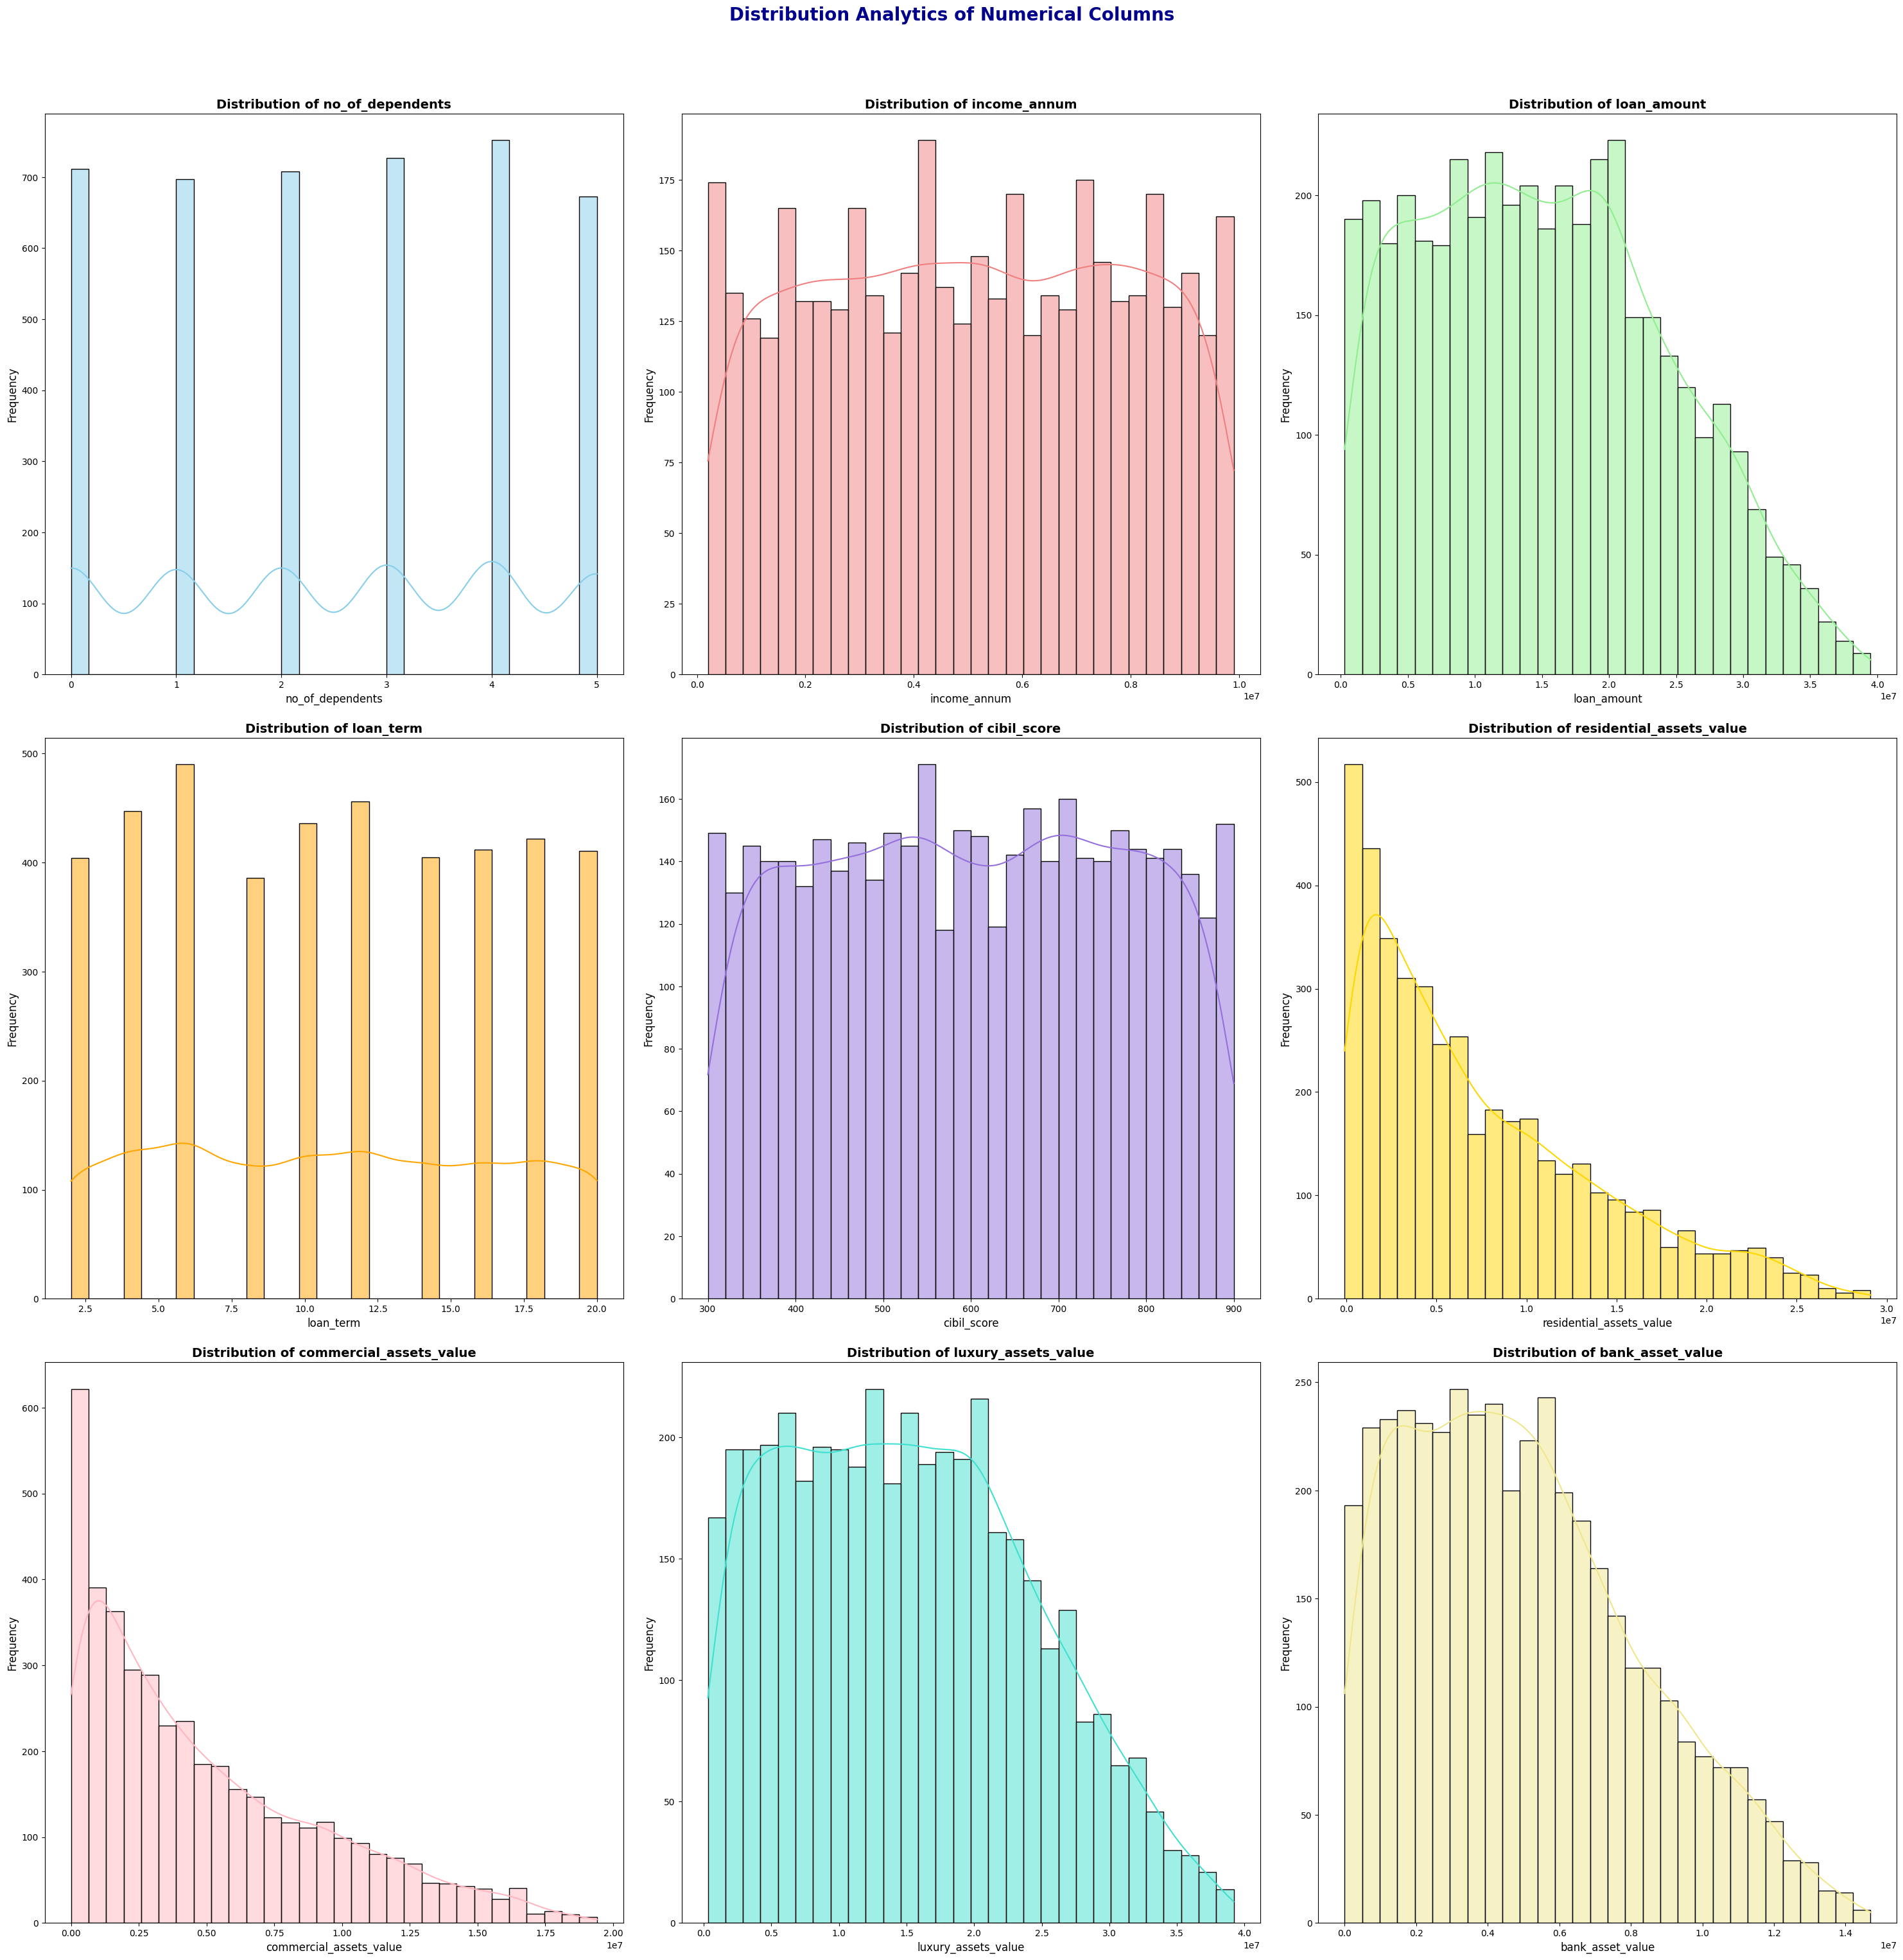

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
columns_to_visualize = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                        'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 
                        'bank_asset_value']

# List of distinct colors for each plot
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'mediumpurple', 'gold', 'lightpink', 'turquoise', 'khaki']

# Set up the figure size for subplots
plt.figure(figsize=(30, 30))

# Add the title for the entire figure
plt.suptitle("Distribution Analytics of Numerical Columns", fontsize=20, fontweight='bold', color='darkblue', y=1.02)

# Loop through each column and plot its distribution with a histogram and KDE
for i, (column, color) in enumerate(zip(columns_to_visualize, colors), 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows, 3 columns)
    sns.histplot(df[column], kde=True, color=color, edgecolor='black', bins=30)  # Histogram with KDE
    
    # Set title and labels
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout and show the plot
plt.tight_layout(pad=2.0)
plt.show()


#### **Check for  Distribution Analytics of categorical Columns**

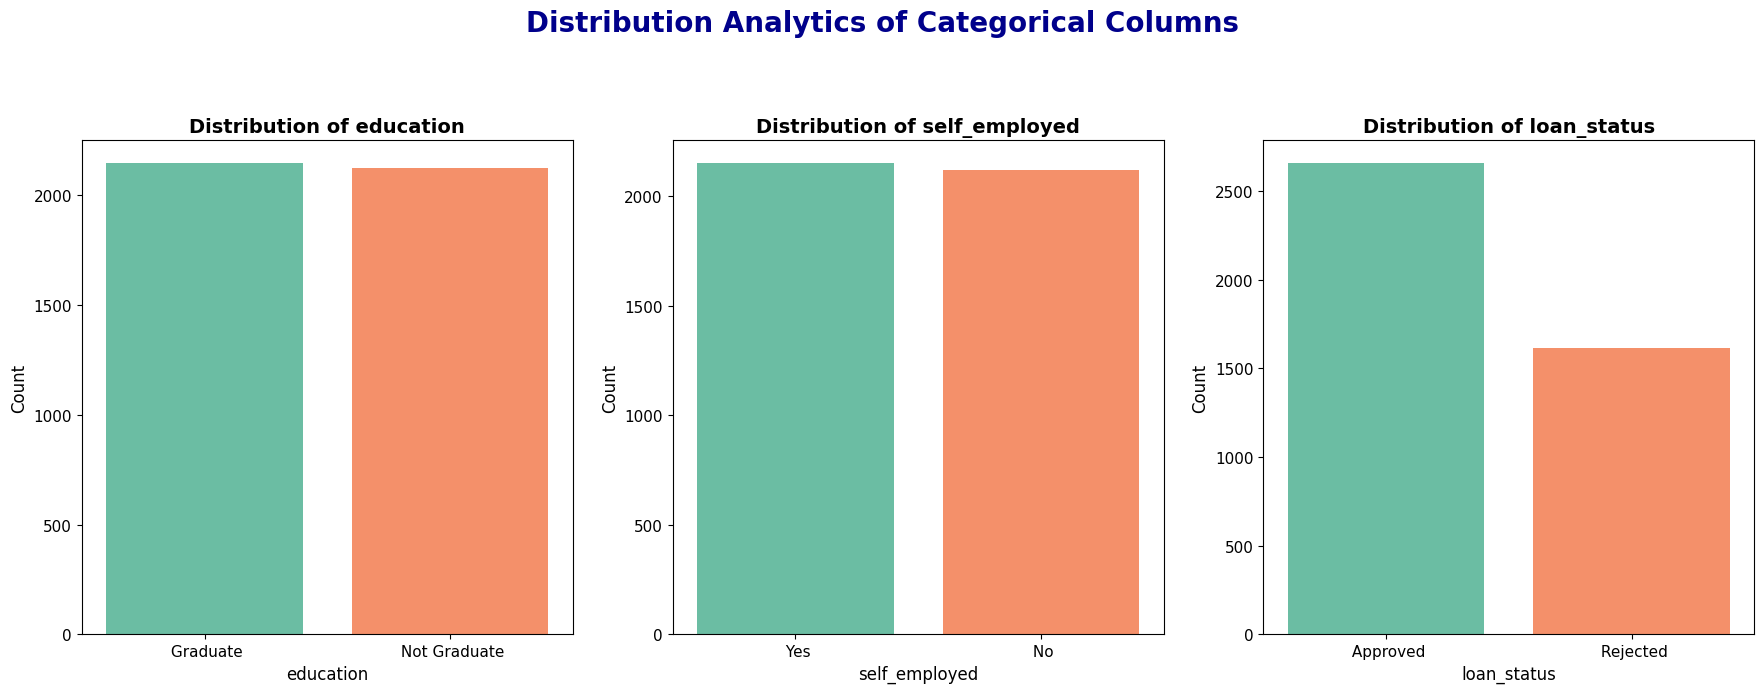

In [19]:
# List of categorical columns to visualize
categorical_columns = ['education', 'self_employed', 'loan_status']
# Set up the figure for subplots
plt.figure(figsize=(18, 12))  # Slightly larger figure for better visualization
# Add the title for the entire figure
plt.suptitle("Distribution Analytics of Categorical Columns", fontsize=20, fontweight='bold', color='darkblue', y=1.02)

# Loop through each categorical column and plot its distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette='Set2', saturation=0.9)  # Using a color palette for better appearance
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')  # Title for each subplot
    plt.xlabel(column, fontsize=12)  # Label x-axis
    plt.ylabel('Count', fontsize=12)  # Label y-axis
    plt.xticks(fontsize=11)  # Adjust font size for x-axis labels
    plt.yticks(fontsize=11)  # Adjust font size for y-axis labels

# Adjust layout and show the plot
plt.tight_layout(pad=2.0)  # Adjust padding for better spacing between subplots
plt.show()

#### **Distribution Analytics of Loan-Related Metrics**

In this section, we will visualize the distribution of various numerical features in our loan dataset, specifically in relation to the loan status. We will use **violin plots** to illustrate the distributions, which will allow us to see not only the median and interquartile range of each feature but also the overall distribution shape.

##### **Features Analyzed**
The following features will be visualized based on loan status:
- **No. of Dependents**: The number of dependents of the loan applicant.
- **Annual Income**: The annual income of the loan applicant.
- **Loan Amount**: The amount of the loan applied for.
- **Loan Term**: The duration for which the loan is taken.
- **CIBIL Score**: The credit score of the applicant.
- **Value of Residential Assets**: The estimated value of residential properties owned.
- **Value of Commercial Assets**: The estimated value of commercial properties owned.
- **Value of Luxury Assets**: The estimated value of luxury items owned (e.g., cars, jewelry).
- **Value of Bank Assets**: The total value of assets held in banks.

#### **Purpose of the Visualization**
These visualizations will help us:
- Understand how different features relate to the loan approval process.
- Identify any patterns or trends based on loan status.
- Highlight any significant differences in distributions based on applicant characteristics.

#### **Violin Plot Visualization**
The following code creates a series of violin plots for each specified feature against loan status. The plots provide a comprehensive overview of how each feature is distributed across different loan statuses.
 


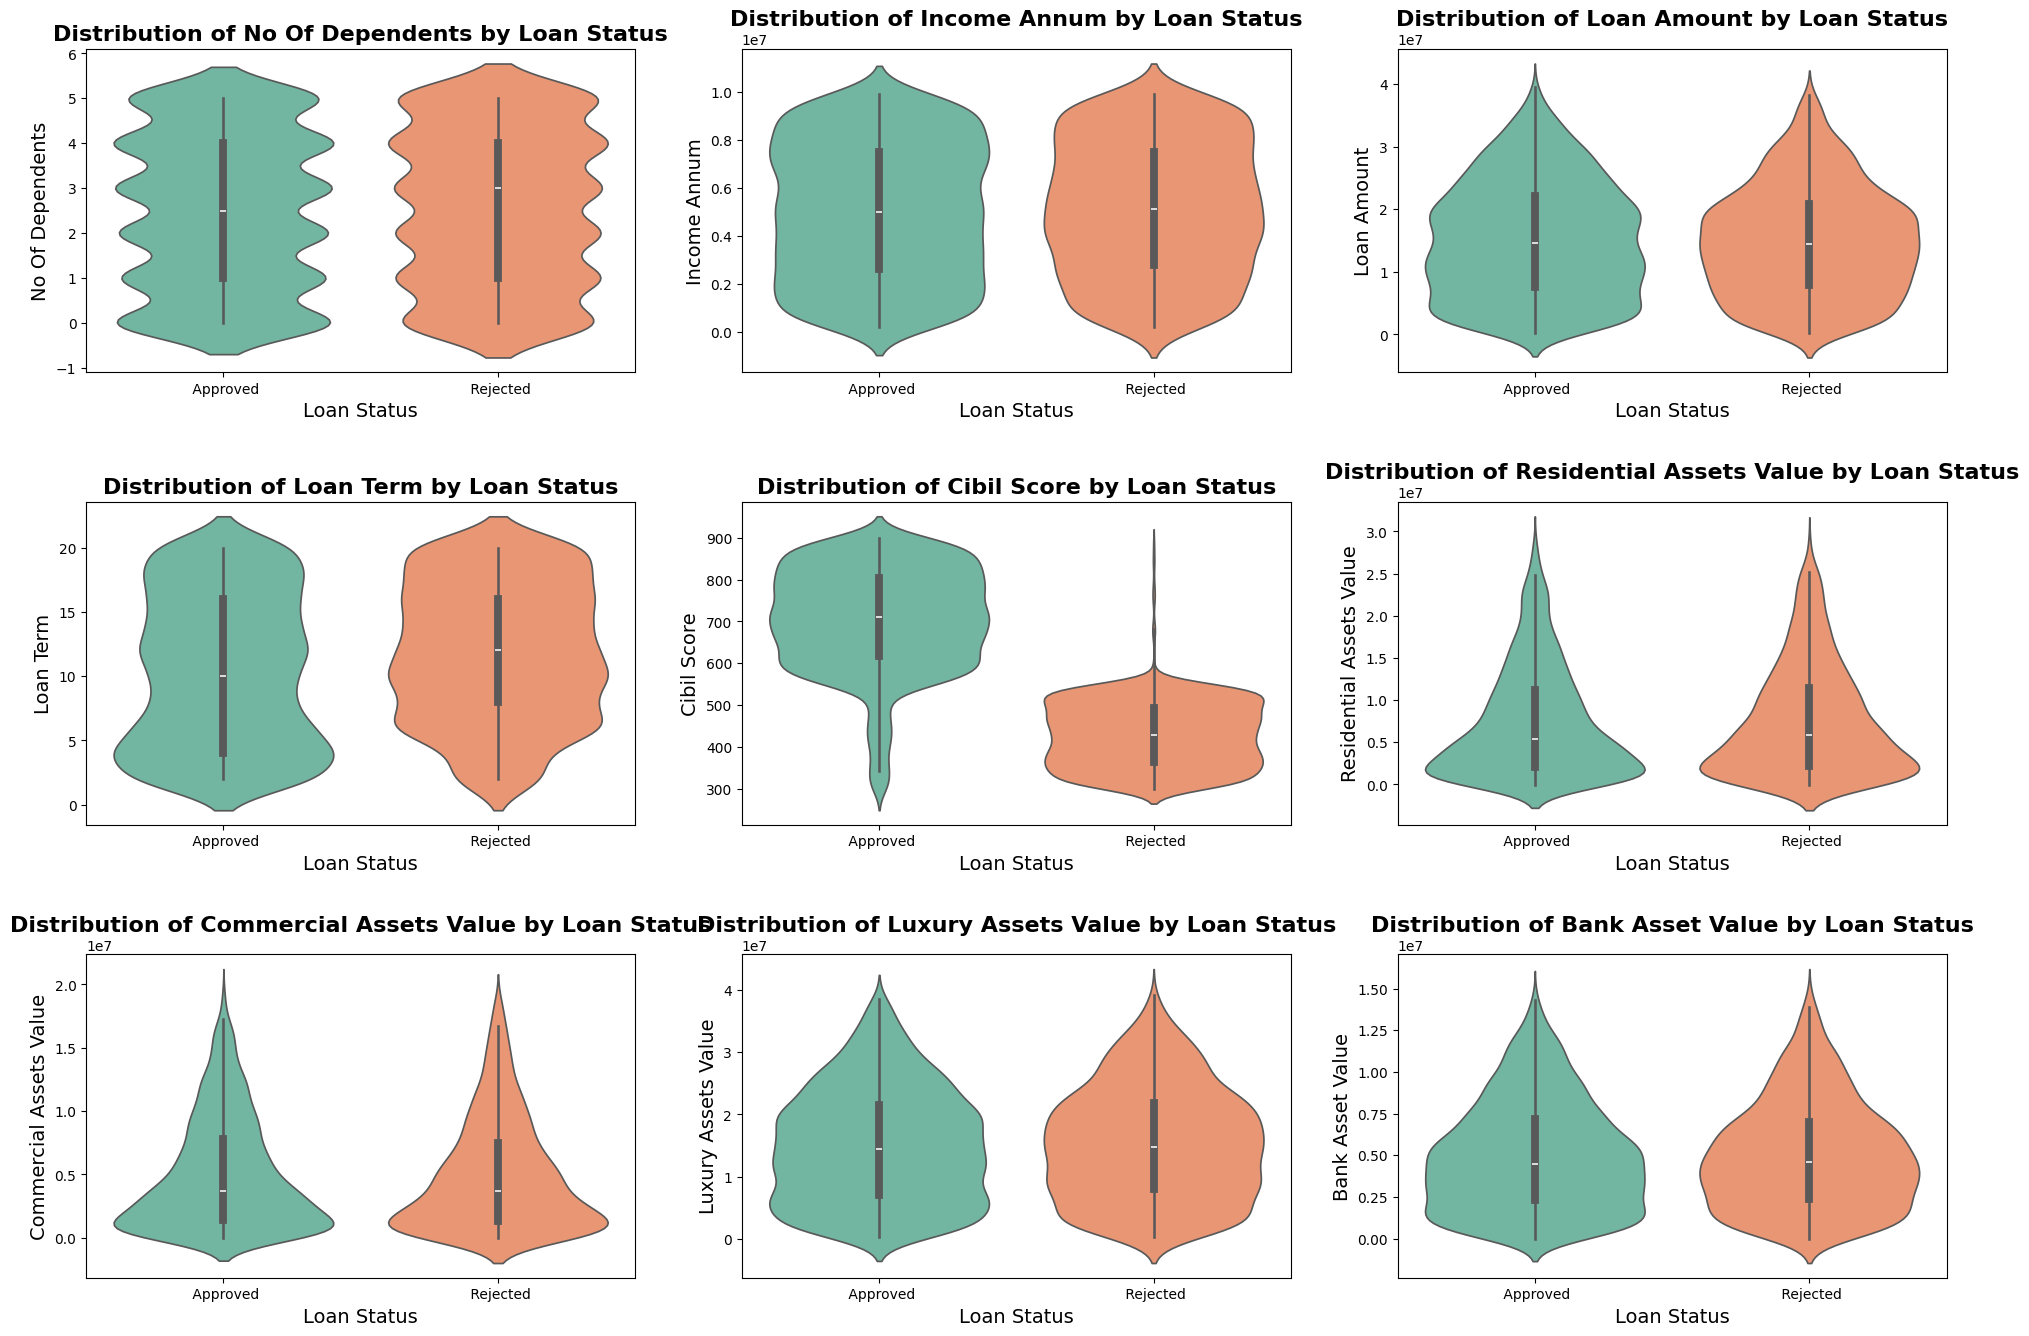

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your DataFrame (assuming it's already loaded as df)
# df = pd.read_csv('loan_data.csv')  # Uncomment and modify if you need to load your data

# Set up the figure size for multiple violin plots
plt.figure(figsize=(20, 14))

# List of numerical columns to visualize
columns_to_visualize = [
    'no_of_dependents', 
    'income_annum', 
    'loan_amount', 
    'loan_term', 
    'cibil_score', 
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]

# Create violin plots for each column
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.violinplot(x='loan_status', y=column, data=df, palette='Set2')
    plt.title(f'Distribution of {column.replace("_", " ").title()} by Loan Status', fontsize=16, fontweight='bold')
    plt.xlabel('Loan Status', fontsize=14)
    plt.ylabel(column.replace("_", " ").title(), fontsize=14)

# Adjust layout and display the plots
plt.tight_layout(pad=3.0)  # Adjust padding between subplots for better readability
plt.show()


#### **Loan Status Visualization**

This section creates visualizations to analyze the distribution of loan status using a count plot and a pie chart.



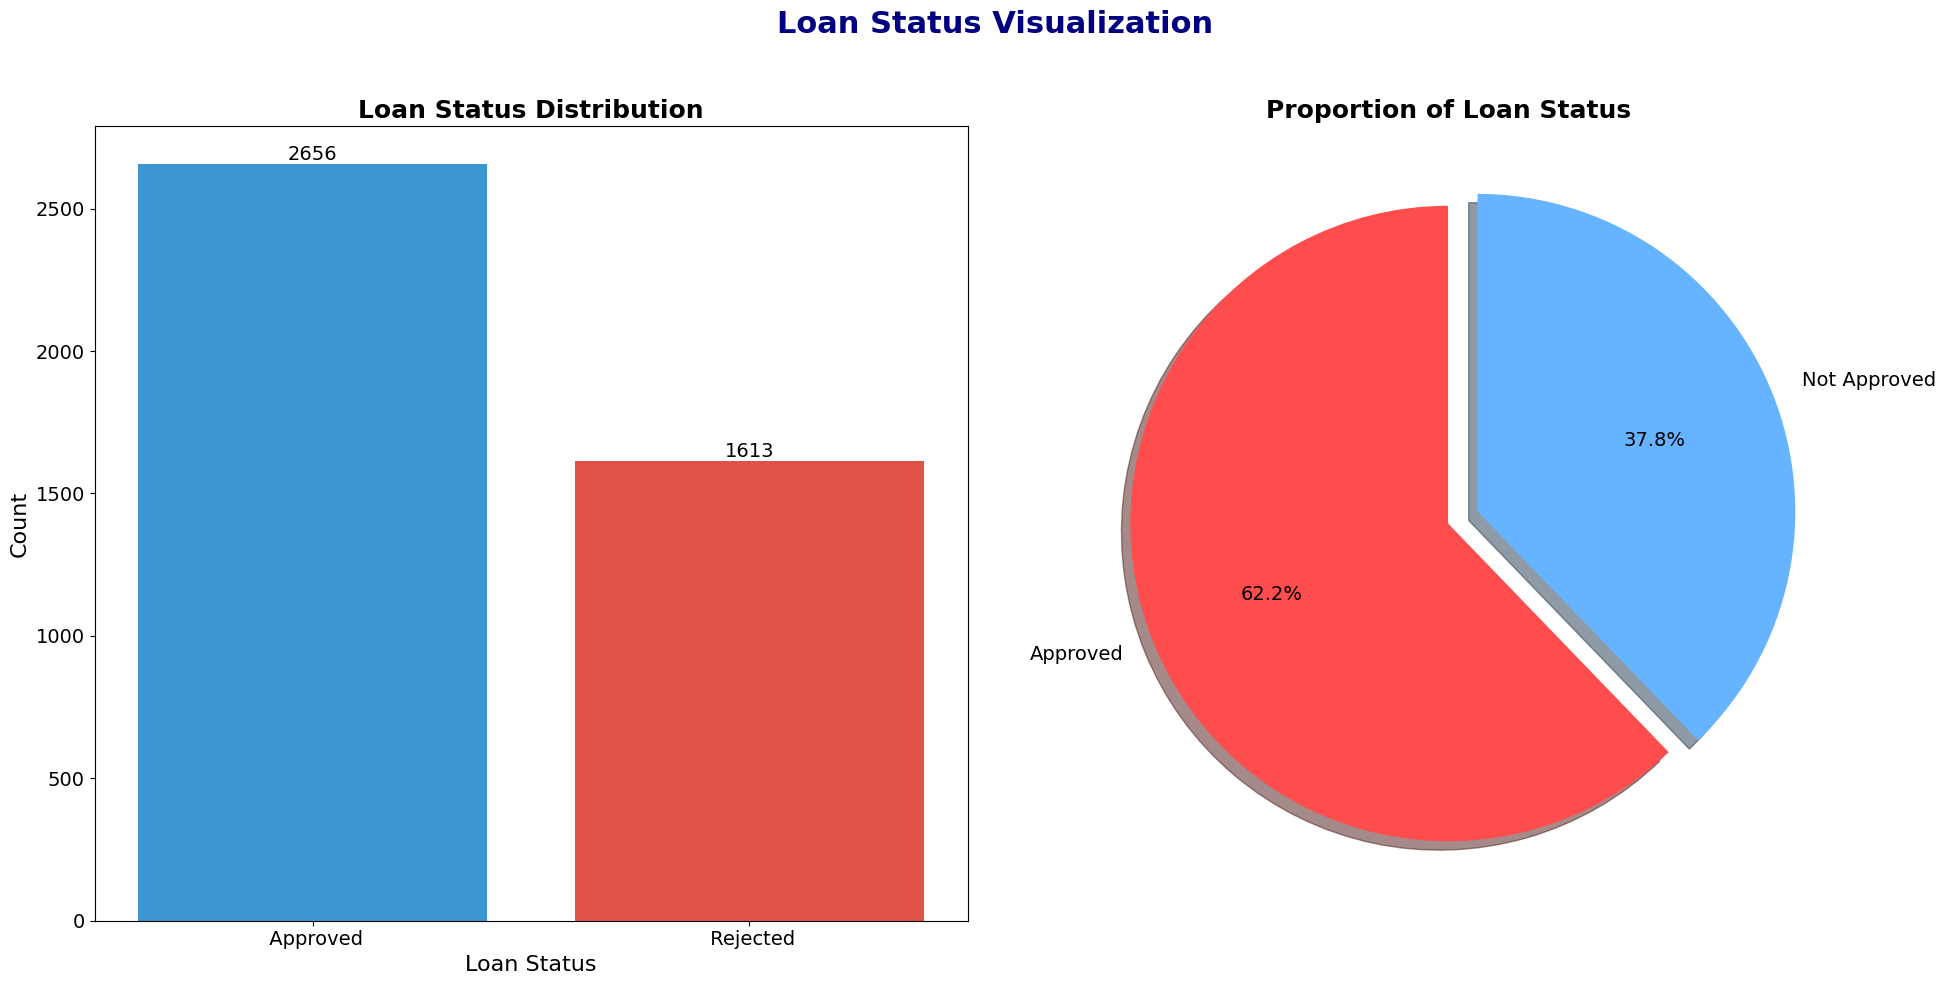

In [21]:
# Creating a subplot for loan status visualization
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Set a main title for the entire figure
plt.suptitle('Loan Status Visualization', fontsize=22, fontweight='bold', color='navy')

# Count plot for the 'loan_status' variable
sns.countplot(x='loan_status', data=df, palette=['#3498db', '#e74c3c'], ax=ax[0], saturation=0.9)  # Updated colors
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)  # Adding labels to the bars
ax[0].set_title('Loan Status Distribution', fontsize=18, fontweight='bold')  # Title for count plot
ax[0].set_xlabel('Loan Status', fontsize=16)  # X-axis label
ax[0].set_ylabel('Count', fontsize=16)  # Y-axis label
ax[0].tick_params(axis='x', labelsize=14)  # Set font size for x-axis labels
ax[0].tick_params(axis='y', labelsize=14)  # Set font size for y-axis labels

# Pie chart for the 'loan_status' variable
plt.subplot(122)
plt.pie(df['loan_status'].value_counts(), 
        labels=['Approved','Not Approved'], 
        explode=[0, 0.1],  # Highlight the approved loan category
        autopct='%1.1f%%', 
        shadow=True, 
        colors=['#ff4d4d', '#66b3ff'],  # Different colors for categories
        startangle=90, textprops={'fontsize': 14})  # Start angle and text properties
plt.title('Proportion of Loan Status', fontsize=18, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()


#### **Loan Status Visualization by Education Level and Employment Type**

We are creating two visualizations:
1. **Loan Status Distribution by Education Level**: This plot shows how the loan status varies across different education levels.
2. **Loan Status Distribution by Employment Type (Self Employed)**: This plot highlights how loan approval rates differ for self-employed individuals versus non-self-employed individuals.


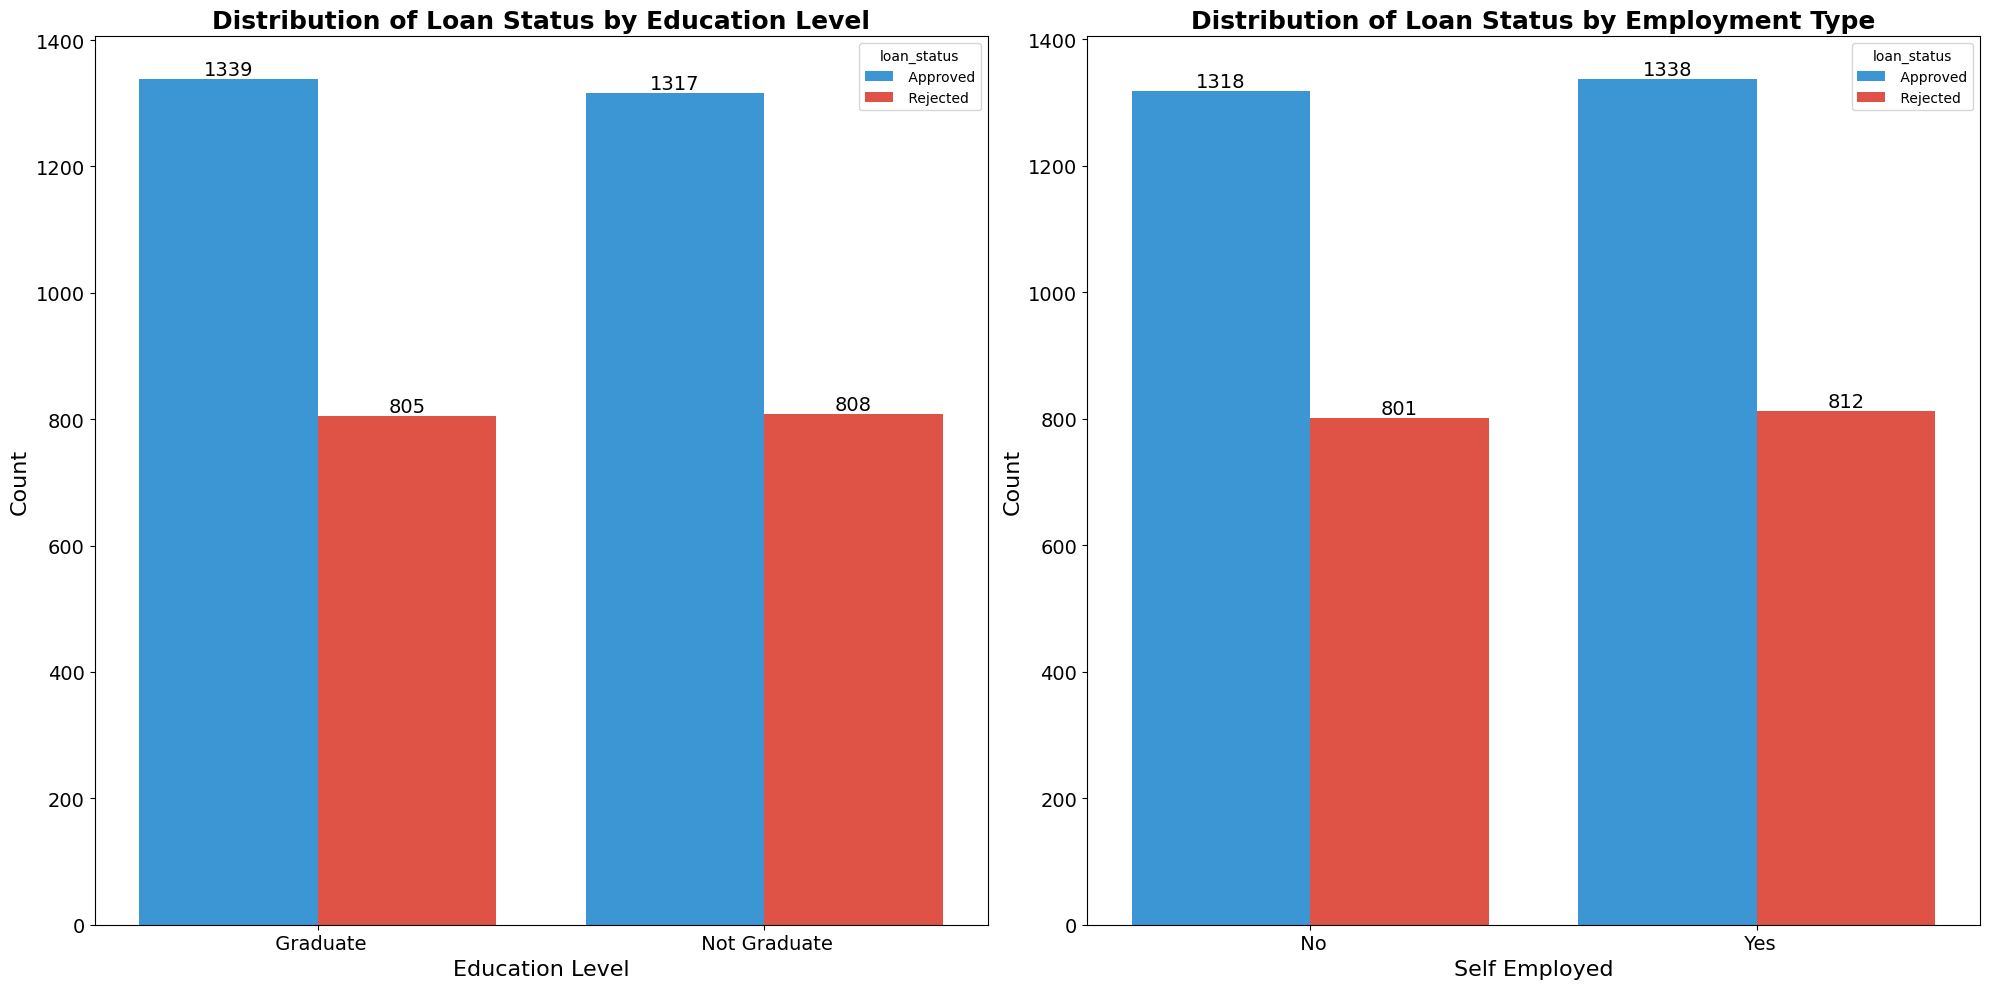

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 2 columns for loan status visualization
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Distribution of Loan Status by Education Level
sns.countplot(
    x='education', 
    hue='loan_status', 
    data=df, 
    palette=['#3498db', '#e74c3c'],  # Blue for Approved, Red for Not Approved
    ax=ax[0], 
    saturation=0.9
)

# Adding bar labels for education plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Titles and labels for education plot
ax[0].set_title('Distribution of Loan Status by Education Level', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Education Level', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)

# Set tick parameters for better readability
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Plot 2: Distribution of Loan Status by Self Employment
sns.countplot(
    x='self_employed', 
    hue='loan_status', 
    data=df, 
    palette=['#3498db', '#e74c3c'],  # Same color scheme for consistency
    ax=ax[1], 
    saturation=0.9
)

# Adding bar labels for self-employed plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=14)

# Titles and labels for self-employed plot
ax[1].set_title('Distribution of Loan Status by Employment Type', fontsize=18, fontweight='bold')
ax[1].set_xlabel('Self Employed', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)

# Set tick parameters for better readability
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


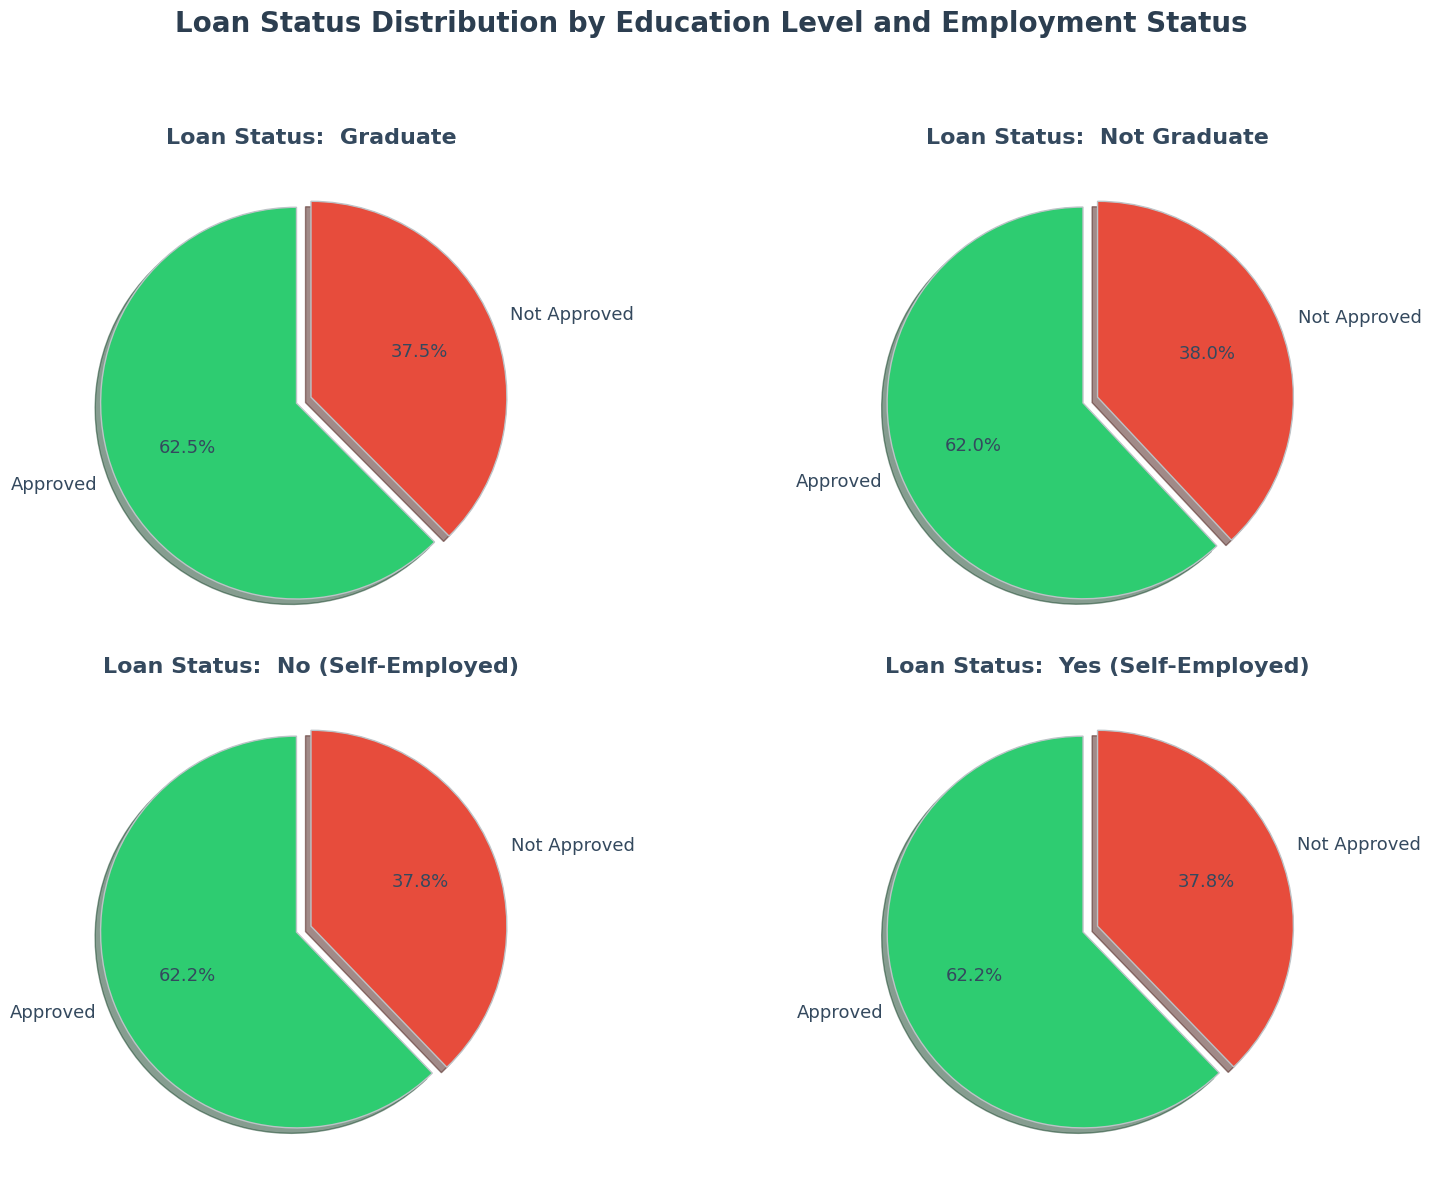

In [23]:
import matplotlib.pyplot as plt

# Grouping data by 'education' and 'self_employed' to prepare for the pie chart
loan_status_counts_education = df.groupby('education')['loan_status'].value_counts().unstack()
loan_status_counts_employment = df.groupby('self_employed')['loan_status'].value_counts().unstack()

# Set the figure size to display both education and self-employed pie charts
plt.figure(figsize=(16, 12))  # Increased figure size for better spacing

# Add a main title for the entire plot
plt.suptitle('Loan Status Distribution by Education Level and Employment Status', fontsize=20, fontweight='bold', color='#2C3E50')

# Define professional colors for the pie charts
colors = ['#2ECC71', '#E74C3C']  # Light green for Approved, Red for Not Approved
shadow_color = '#BDC3C7'  # Light shadow color

# Plot for Loan Status by Education Level
for i, education in enumerate(loan_status_counts_education.index):
    plt.subplot(2, len(loan_status_counts_education), i + 1)  # First row for education
    plt.pie(loan_status_counts_education.loc[education], 
            labels=['Approved', 'Not Approved'], 
            explode=[0.08, 0],  # Slightly explode the 'Approved' slice
            autopct='%1.1f%%', 
            shadow=True, 
            colors=colors,  # Use professional colors
            startangle=90, 
            wedgeprops={'edgecolor': shadow_color},  # Add shadow-like edges
            textprops={'fontsize': 13, 'color': '#34495E'})  # Text size and color
    plt.title(f'Loan Status: {education}', fontsize=16, fontweight='bold', color='#34495E')  # Subplot title color

# Plot for Loan Status by Self-Employment Status
for i, employment in enumerate(loan_status_counts_employment.index):
    plt.subplot(2, len(loan_status_counts_education), i + len(loan_status_counts_education) + 1)  # Second row for self-employed
    plt.pie(loan_status_counts_employment.loc[employment], 
            labels=['Approved', 'Not Approved'], 
            explode=[0.08, 0],  # Slightly explode the 'Approved' slice
            autopct='%1.1f%%', 
            shadow=True, 
            colors=colors,  # Use professional colors
            startangle=90, 
            wedgeprops={'edgecolor': shadow_color},  # Add shadow-like edges
            textprops={'fontsize': 13, 'color': '#34495E'})  # Text size and color
    plt.title(f'Loan Status: {employment} (Self-Employed)', fontsize=16, fontweight='bold', color='#34495E')  # Subplot title color

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.93])  # Adjusted layout to fit the main title
plt.show()


#### **Loan Data Analysis Visualization**

In this notebook, we visualize different metrics from a loan dataset, including the number of dependents, income per annum, loan amount, loan term, CIBIL score, and residential asset value, all categorized by the loan status.



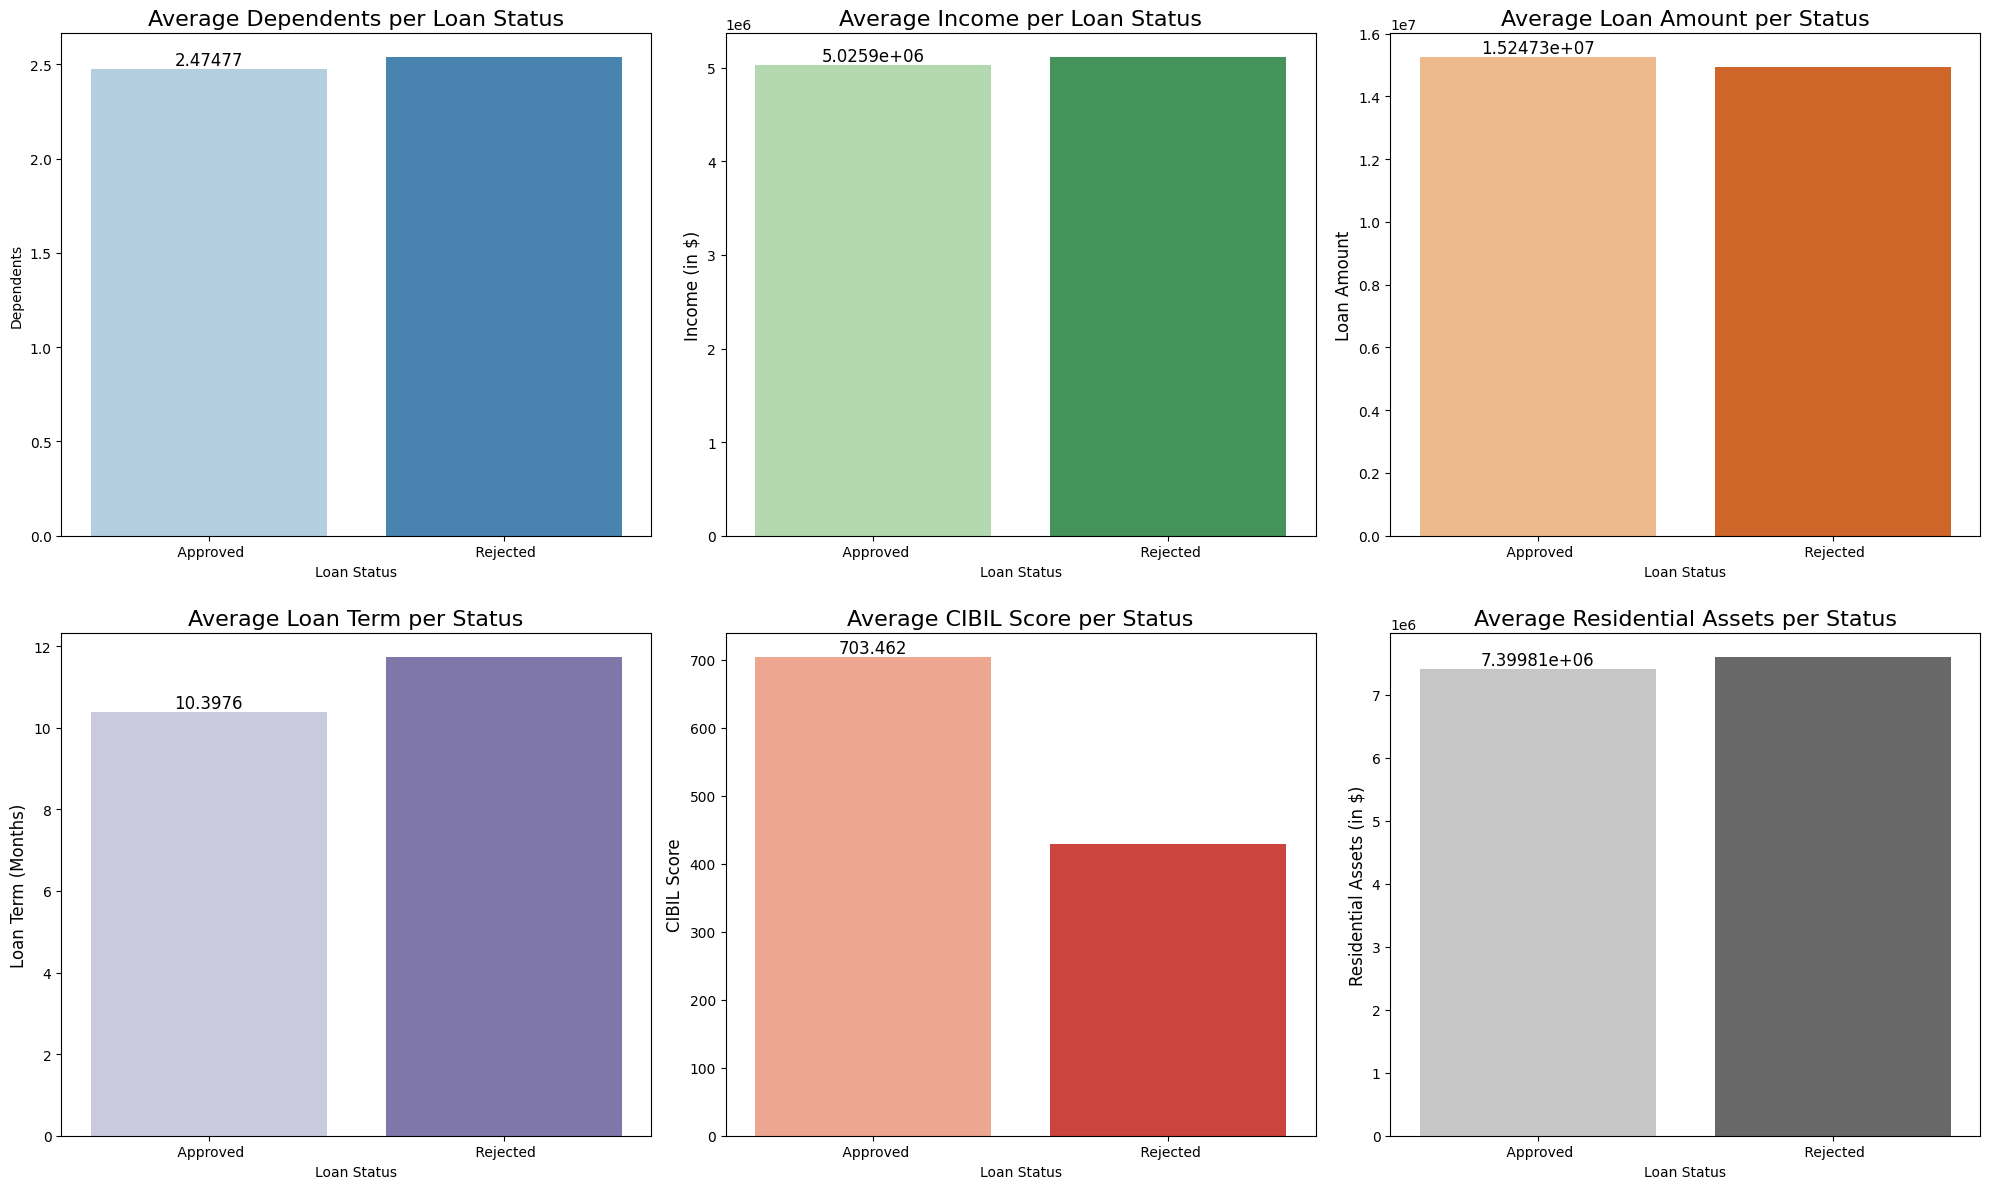

In [24]:
import pandas as pd  # Data manipulation
import seaborn as sns  # Visualization
import matplotlib.pyplot as plt  # Plotting

# Assuming df is already defined and contains the necessary loan data

# Group the data by 'loan_status'
group_data = df.groupby('loan_status')

# Set up subplots for essential numeric columns
fig, ax = plt.subplots(2, 3, figsize=(20, 12))  # 2 rows, 3 columns for 6 simple charts
ax = ax.flatten()  # Flatten the axis array for easier indexing

# Simplified Titles and Bar Charts for easy understanding

# Plot 1: Average Number of Dependents
sns.barplot(
    x=group_data['no_of_dependents'].mean().index,
    y=group_data['no_of_dependents'].mean().values,
    palette='Blues',
    ax=ax[0]
)
ax[0].set_title('Average Dependents per Loan Status', fontsize=16)
ax[0].set_xlabel('Loan Status')
ax[0].set_ylabel('Dependents')
ax[0].bar_label(ax[0].containers[0], fontsize=12)

# Plot 2: Average Income per Annum
sns.barplot(
    x=group_data['income_annum'].mean().index,
    y=group_data['income_annum'].mean().values,
    palette='Greens',
    ax=ax[1]
)
ax[1].set_title('Average Income per Loan Status', fontsize=16)
ax[1].set_xlabel('Loan Status')
ax[1].set_ylabel('Income (in $)', fontsize=12)
ax[1].bar_label(ax[1].containers[0], fontsize=12)

# Plot 3: Average Loan Amount
sns.barplot(
    x=group_data['loan_amount'].mean().index,
    y=group_data['loan_amount'].mean().values,
    palette='Oranges',
    ax=ax[2]
)
ax[2].set_title('Average Loan Amount per Status', fontsize=16)
ax[2].set_xlabel('Loan Status')
ax[2].set_ylabel('Loan Amount', fontsize=12)
ax[2].bar_label(ax[2].containers[0], fontsize=12)

# Plot 4: Average Loan Term
sns.barplot(
    x=group_data['loan_term'].mean().index,
    y=group_data['loan_term'].mean().values,
    palette='Purples',
    ax=ax[3]
)
ax[3].set_title('Average Loan Term per Status', fontsize=16)
ax[3].set_xlabel('Loan Status')
ax[3].set_ylabel('Loan Term (Months)', fontsize=12)
ax[3].bar_label(ax[3].containers[0], fontsize=12)

# Plot 5: Average CIBIL Score
sns.barplot(
    x=group_data['cibil_score'].mean().index,
    y=group_data['cibil_score'].mean().values,
    palette='Reds',
    ax=ax[4]
)
ax[4].set_title('Average CIBIL Score per Status', fontsize=16)
ax[4].set_xlabel('Loan Status')
ax[4].set_ylabel('CIBIL Score', fontsize=12)
ax[4].bar_label(ax[4].containers[0], fontsize=12)

# Plot 6: Average Residential Asset Value
sns.barplot(
    x=group_data['residential_assets_value'].mean().index,
    y=group_data['residential_assets_value'].mean().values,
    palette='Greys',
    ax=ax[5]
)
ax[5].set_title('Average Residential Assets per Status', fontsize=16)
ax[5].set_xlabel('Loan Status')
ax[5].set_ylabel('Residential Assets (in $)', fontsize=12)
ax[5].bar_label(ax[5].containers[0], fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#### **Correlation Heatmap of Loan dataset Features**
In this section, we visualize the correlation between various numerical features in our loan dataset using a heatmap. This helps us understand how different features are related to each other, which can be important for feature selection and model building.

#### **Selected Features for Analysis**
The following features are included in the correlation analysis:
- **Number of Dependents (`no_of_dependents`)**
- **Annual Income (`income_annum`)**
- **Loan Amount (`loan_amount`)**
- **Loan Term (`loan_term`)**
- **CIBIL Score (`cibil_score`)**
- **Residential Assets Value (`residential_assets_value`)**
- **Commercial Assets Value (`commercial_assets_value`)**
- **Luxury Assets Value (`luxury_assets_value`)**
- **Bank Asset Value (`bank_asset_value`)**

#### **Heatmap Visualization**

The heatmap below represents the correlation coefficients between the selected features. 

- A value close to **1** indicates a strong positive correlation.
- A value close to **-1** indicates a strong negative correlation.
- A value around **0** indicates no correlation.

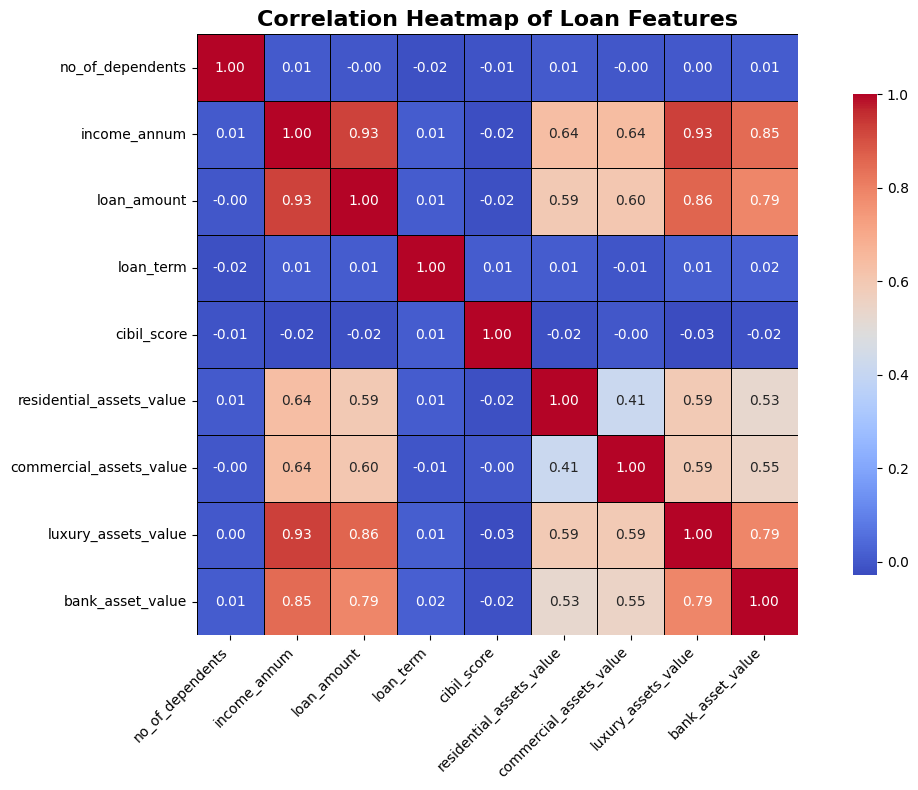

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame creation (Uncomment and modify if you need to load your data)
# df = pd.read_csv('loan_data.csv')

# List of numerical columns to visualize
columns_to_visualize = [
    'no_of_dependents', 
    'income_annum', 
    'loan_amount', 
    'loan_term', 
    'cibil_score', 
    'residential_assets_value', 
    'commercial_assets_value', 
    'luxury_assets_value', 
    'bank_asset_value'
]

# Calculate the correlation matrix
correlation_matrix = df[columns_to_visualize].corr()

# Set up the figure size for the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, 
            annot=True,        # Show the correlation coefficients on the heatmap
            fmt='.2f',        # Format for the annotations
            cmap='coolwarm',   # Color map to use
            square=True,       # Make cells square-shaped
            cbar_kws={"shrink": .8},  # Adjust color bar size
            linewidths=0.5,    # Width of the lines that will divide each cell
            linecolor='black')  # Color of the lines dividing the cells

# Set the title and labels
plt.title('Correlation Heatmap of Loan Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

# Show the plot
plt.tight_layout()
plt.show()
